In [3]:
# Code to unzip a TAR file on Windows
import tarfile 
# open file 
file = tarfile.open('VIAJES/202406_Viajes_distritos.tar') # zipped folder containing all data monthly (typically in .tar format)
# extracting file 
file.extractall('./basicos_distritos_viajes_202406') # unzipped folder containing several files
file.close() 

In [3]:
import config as cfg
import os
import pandas as pd
from utils import get_overview, open_gz

In [4]:
geometria_dir = cfg.GEOMETRIA_DATA
personas_dir = cfg.PERSONAS_DATA
viajes_dir = cfg.VIAJES_DATA

In [5]:
# personas_path = personas_dir/'basicos_municipios_personas_202201' # personas folder
viajes_path = viajes_dir/'basicos_distritos_viajes_202406' # viajes folder

In [6]:
# FIXME: Figure out how to open OD_rutas ('Error tokenizing data')
rutas = pd.read_csv(geometria_dir/'20220801_calidad_rutas.csv', encoding='latin1', sep=';')

In [7]:
rutas

,segmentsID,ligeros,trips,veh_inf,veh_sup,abs_deviation,relative_deviation
0,ii{`Gd{qUen@_K ci}`GnoqUtzAjX,20103,20378.854,6792.951333,20378.854,13310.048667,0.662093
1,cfc{Fhe}KeDy|F a`e{FhqpKdx@~sK,8946,6410.931,2136.977000,6410.931,6809.023000,0.761125
2,_thpFp~pJd[{`D m_hpF|nkJq[|eC ykepFhyvIihBjdY ...,15945,14166.913,4722.304333,14166.913,11222.695667,0.703838
3,_xshFpf}Tk`Bu|@ uhuhFva|Ttj@~V uhuhFva|TtOm@,17933,15201.167,5067.055667,15201.167,12865.944333,0.717445
4,_lzsFxr`Y|PhxF aazsFjegYkKicF ejzsFlefYbOteA i...,29774,19738.294,6579.431333,19738.294,23194.568667,0.779021
5,sg|fGh{rp@xoCu~M }h|fGbstp@bqCovO s|wfG|{cp@ul...,14647,11450.613,3816.871000,11450.613,10830.129000,0.739409


In [37]:
# get_overview(viajes)

In [10]:
viajes_1 = open_gz(viajes_path, 1)

c:\Users\rqg886\Desktop\thesis_project\mobility_data\utils.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data, [f for f in os.listdir(data) if f.endswith('.csv.gz')][day]), compression='gzip', sep='|')


In [11]:
viajes_1.shape

(18021827, 15)

In [12]:
viajes_1.head()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
0,20240602,11,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,3.119,38.524
1,20240602,12,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,4.755,49.671
2,20240602,14,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,7.209,88.895
3,20240602,17,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.516,27.873
4,20240602,21,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.178,27.937


In [13]:
viajes_1.tail()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
18021822,20240602,21,18153,5200108,>50,no_frecuente,trabajo_estudio,no,no,52,>15,45-65,hombre,2.851,640.886
18021823,20240602,13,29040,5200108,>50,no_frecuente,trabajo_estudio,no,no,52,10-15,45-65,NaN,3.312,785.343
18021824,20240602,16,2004502,FRI15,0.5-2,no_frecuente,trabajo_estudio,no,no,20,10-15,0-25,NaN,3.135,2.317
18021825,20240602,18,20067,FRI15,10-50,no_frecuente,trabajo_estudio,no,no,20,>15,25-45,NaN,3.269,34.482
18021826,20240602,14,09109_AM,FRI15,>50,no_frecuente,trabajo_estudio,no,no,31,10-15,NaN,NaN,5.057,502.294


In [23]:
# madrid = viajes_13[viajes_13['origen'].str.contains("28079") & viajes_13['destino'].str.contains("28079")]
madrid = viajes_1[viajes_1['origen'].str.startswith("28079") & viajes_1['destino'].str.startswith("28")]


In [24]:
len(madrid)

559820

In [26]:
madrid.tail()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
17893772,20240602,17,2807916,28903,10-50,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,mujer,4.433,71.684
17893773,20240602,18,2807916,28903,10-50,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,mujer,4.433,68.290
17893774,20240602,19,2807916,28903,10-50,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,2.609,49.021
17893796,20240602,15,2807908,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,25-45,mujer,5.256,48.804
17893820,20240602,8,2807908,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,10-15,45-65,mujer,3.403,23.526


In [16]:
import matplotlib.pyplot as plt

In [17]:
nombres_distritos = pd.read_csv(r'C:\Users\rqg886\Desktop\thesis_project\mobility_data\ZONIFICACION\distritos\nombres_distritos.csv', sep = '|')
poblacion_distritos = pd.read_csv(r'C:\Users\rqg886\Desktop\thesis_project\mobility_data\ZONIFICACION\distritos\poblacion_distritos.csv', sep = '|')

In [18]:
nombres_distritos

,ID,name
0,01001,Alegría-Dulantzi
1,01002,Amurrio
2,01004_AM,Artziniega agregacion de municipios
3,01009_AM,Asparrena agregacion de municipios
4,01010,Ayala/Aiara
...,...,...
3787,34072453051,Comunidad de Castrotierra de la Valduerna
3788,34072453052,Foncabada
3789,34074053074,Comunidad de Sepúlveda y Riaza
3790,34074253075,San Bartolomé


In [21]:
distritos_madrid = nombres_distritos[nombres_distritos['ID'].str.startswith("28")]
ciudad_madrid = distritos_madrid[distritos_madrid['name'].str.contains("Madrid distrito", case=False, na=False)]
# FIXME: Filter based on these data: https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Areas-de-informacion-estadistica/Territorio-climatologia-y-medio-ambiente/Territorio/Mapas-de-Distritos-y-Barrios/?vgnextfmt=default&vgnextoid=240d64c49579f410VgnVCM1000000b205a0aRCRD&vgnextchannel=e59b40ebd232a210VgnVCM1000000b205a0aRCRD

In [22]:
ciudad_madrid

,ID,name
2096,2807901,Madrid distrito 01
2097,2807902,Madrid distrito 02
2098,2807903,Madrid distrito 03
2099,2807904,Madrid distrito 04
2100,2807905,Madrid distrito 05
2101,2807906,Madrid distrito 06
2102,2807907,Madrid distrito 07
2103,2807908,Madrid distrito 08
2104,2807909,Madrid distrito 09
2105,2807910,Madrid distrito 10


In [27]:
import geopandas as gpd

# Read the shapefile
gdf = gpd.read_file(r"C:\Users\rqg886\Desktop\THESIS_PROJECT\mobility_data\ZONIFICACION\distritos\zonificacion_distritos.shp")
centroides = gpd.read_file(r"C:\Users\rqg886\Desktop\THESIS_PROJECT\mobility_data\ZONIFICACION\distritos\zonificacion_distritos_centroides.shp")

gdf.head()

,ID,geometry
0,01001,"MULTIPOLYGON (((538090.184 4737372.731, 537856..."
1,01002,"MULTIPOLYGON (((501984.889 4753913.870, 501945..."
2,01004_AM,"MULTIPOLYGON (((488613.969 4778775.797, 488800..."
3,01009_AM,"POLYGON ((554658.552 4740793.546, 554617.177 4..."
4,01010,"POLYGON ((499938.436 4768365.760, 499305.175 4..."


In [28]:
madrid_city_gdf = gdf[gdf['ID'].isin(ciudad_madrid['ID'])]

In [29]:
len(madrid_city_gdf)

21

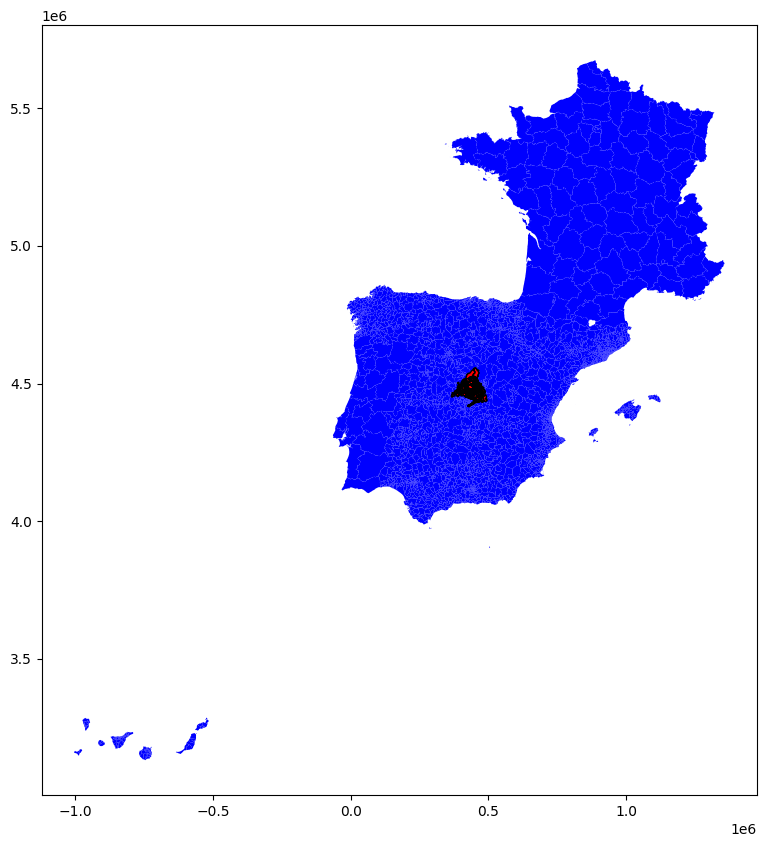

In [30]:
import matplotlib.pyplot as plt
ax = gdf.plot(color='blue', figsize=(10, 10))
gdf[gdf['ID'].str.startswith("28")].plot(ax=ax, color='red', edgecolor='black')
plt.show()

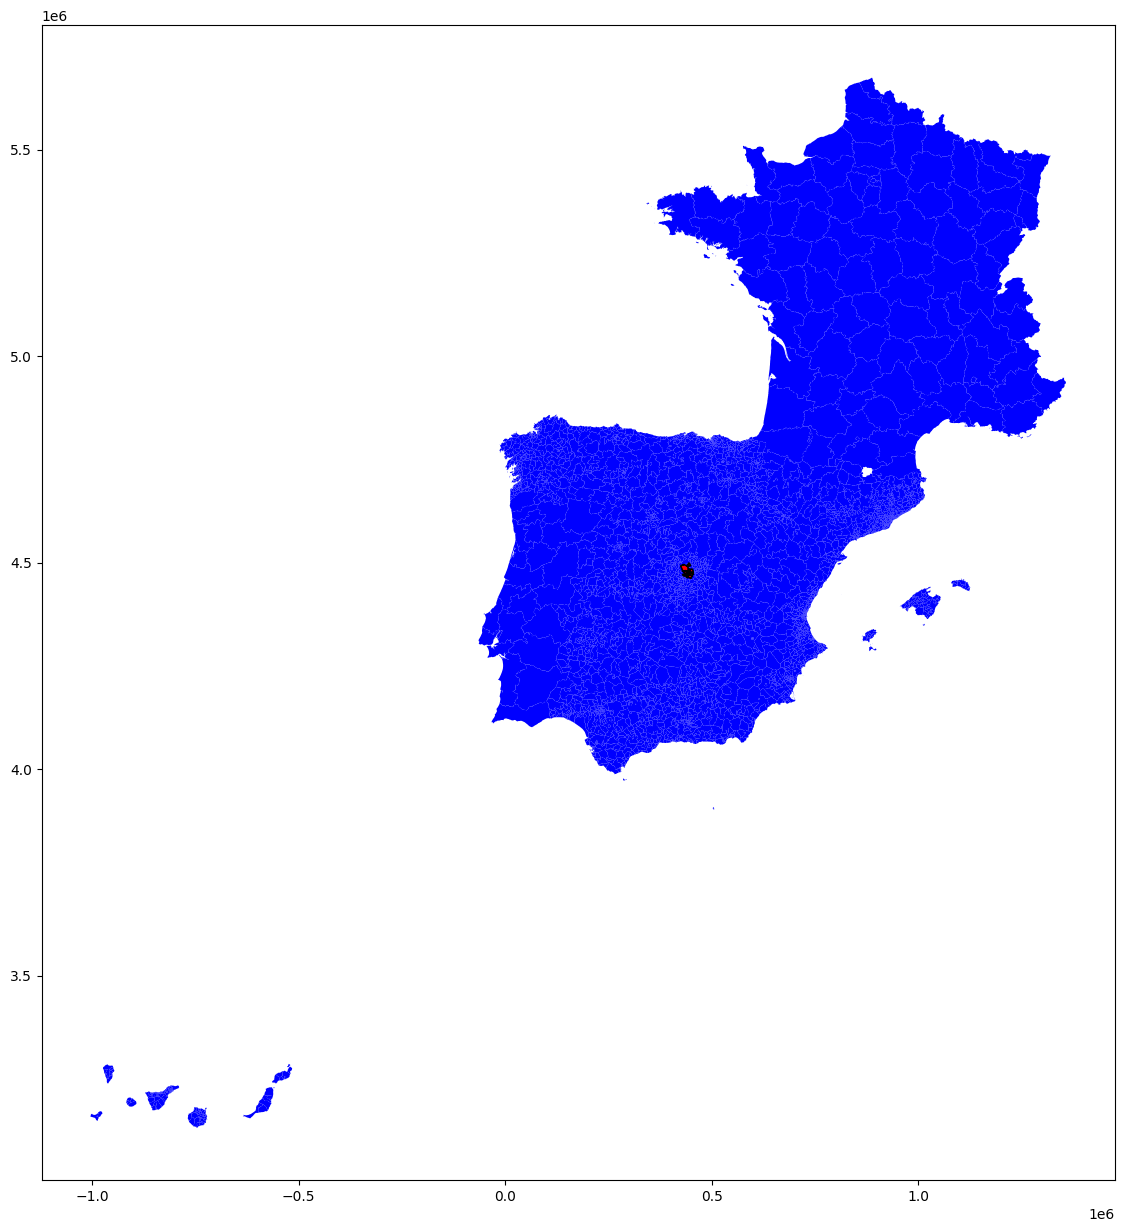

In [38]:
ax = gdf.plot(color='blue', figsize=(15, 15))
gdf[gdf['ID'].str.startswith("28079")].plot(ax=ax, color='red', edgecolor='black')
plt.show()

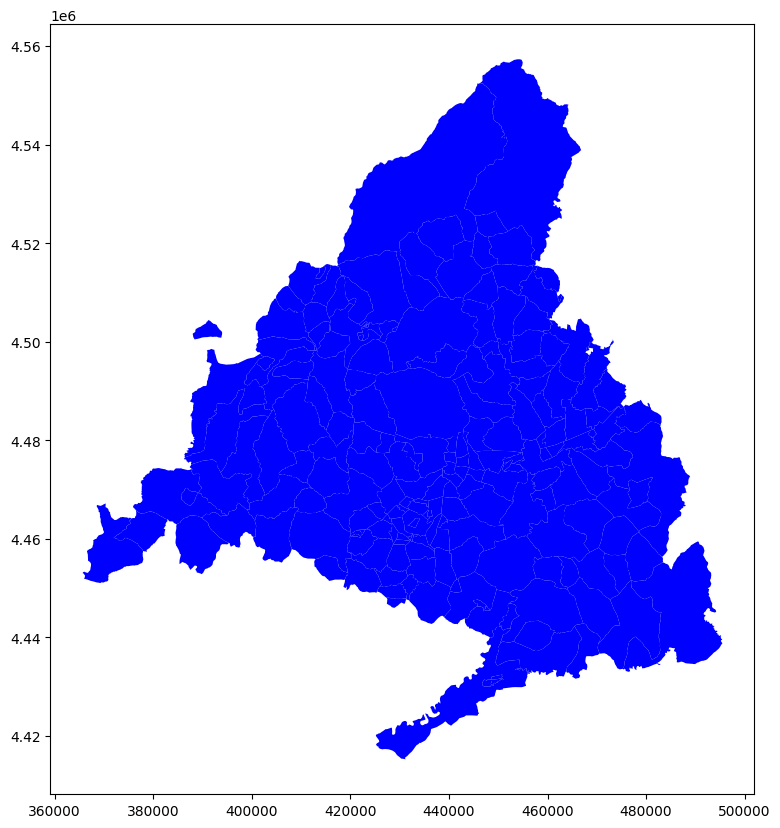

In [36]:
ax = gdf[gdf['ID'].str.startswith("28")].plot(color='blue', figsize=(10, 10))

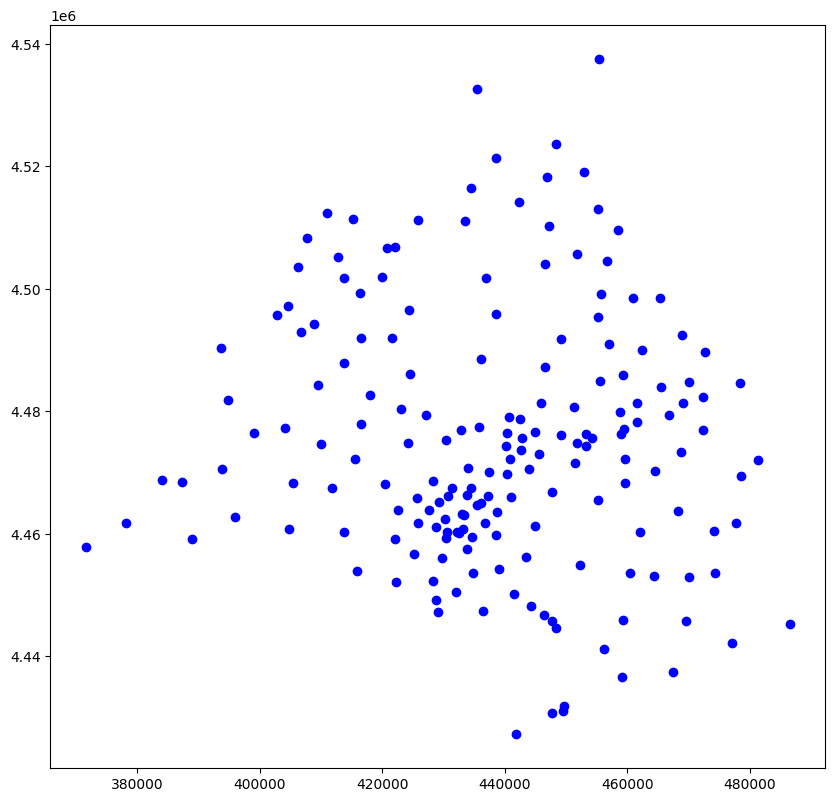

In [32]:
ax = centroides[centroides['ID'].str.startswith("28")].plot(color='blue', figsize=(10, 10))

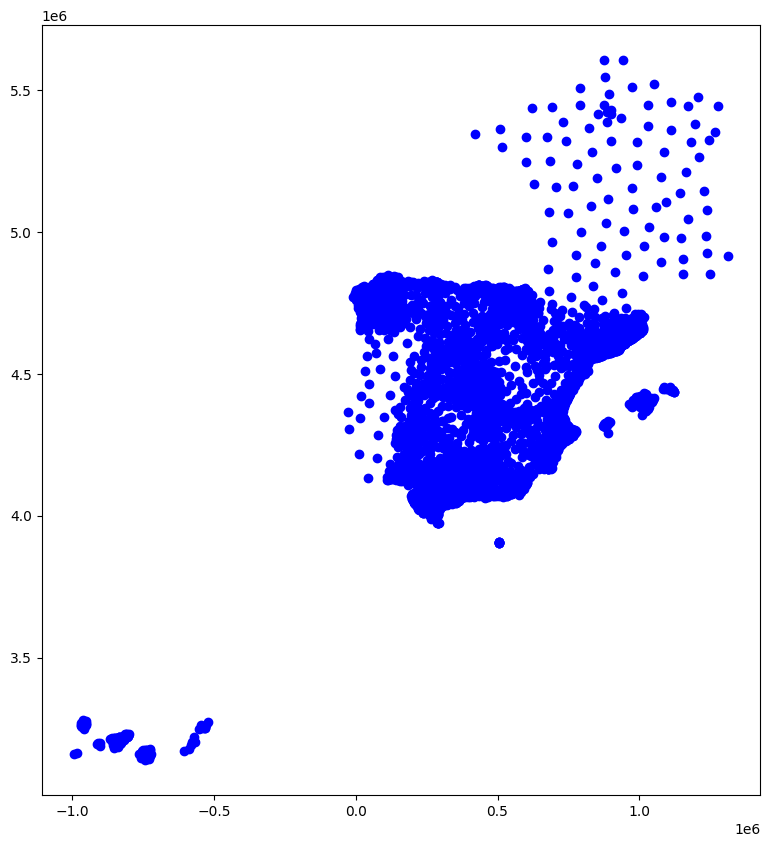

In [33]:
ax = centroides.plot(color='blue', figsize=(10, 10))

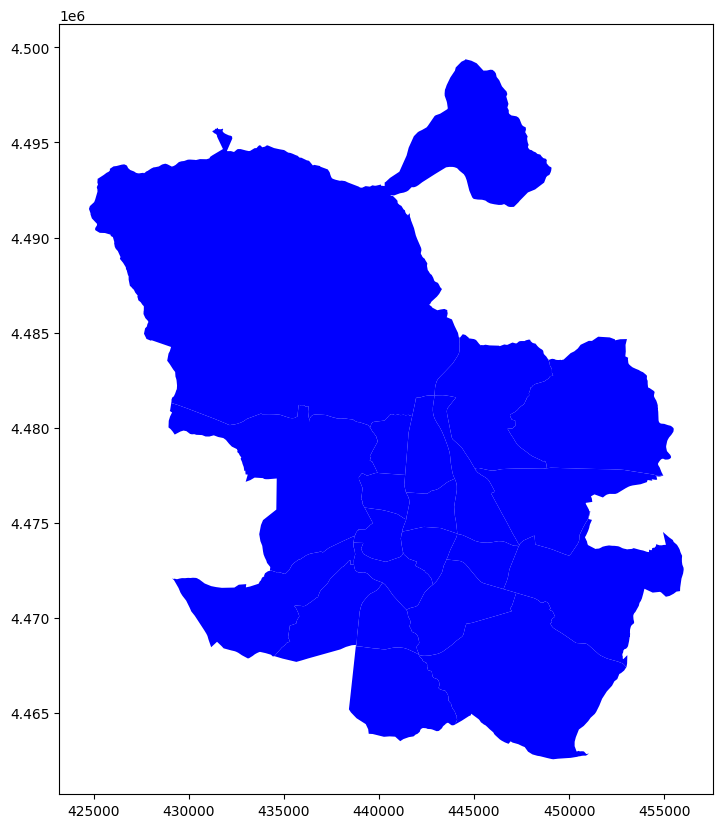

In [34]:
ax = madrid_city_gdf.plot(color='blue', figsize=(10, 10))